<a href="https://colab.research.google.com/github/rajkamaludaya/cv_web_app/blob/main/ImageClassificationUsingFeedForwardNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [23]:
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [3]:
labelMap = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


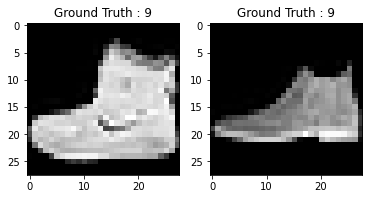

In [8]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]));
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]));

Process the data
The images are grayscale and the pixel values range from 0 to 255. We will apply the following preprocessing to the data before feeding it to the network.

Convert each image matrix ( 28x28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.

In [10]:
print('Training image shape : ', train_images.shape[1:])

Training data shape :  (28, 28)


In [19]:
dimData = np.prod(train_images.shape[1:]) #The np. prod() is a numpy mathematical library method that returns the product of the array of elements over a given axis

Data pre-processing

In [14]:
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [17]:
print('Training data shape : ', train_data.shape[0:])

Training data shape :  (60000, 784)


Convert the data to float and scale the values between 0 to 1.

In [20]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

Convert the labels from integer to categorical ( one-hot ) encoding since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the integer. For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000100000

In [26]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  9
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
#Training